In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb, mnist
from tensorflow.python.keras.backend import flatten

## Exercise 1

#### Load data

In [3]:
(x_train, y_train), (x_test, y_test) = np.array(imdb.load_data(num_words=10000, maxlen=250), dtype="object")
x_train[[5]]

array([list([1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 2, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901])],
      dtype=object)

In [4]:
x_train = pad_sequences(x_train, 250)
x_test = pad_sequences(x_test, 250)

#### Define and compile model

In [5]:
model = keras.Sequential(
    [
        layers.Embedding(input_dim=10001, output_dim=64, mask_zero=True),
        layers.LSTM(units=32),
        layers.Dense(units=1, activation="sigmoid"),
    ]
)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640064    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 652,513
Trainable params: 652,513
Non-trainable params: 0
_________________________________________________________________


#### Train model

In [6]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=8,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/8
536/536 [==============================] - 62s 109ms/step - loss: 0.4953 - accuracy: 0.7440 - val_loss: 0.3177 - val_accuracy: 0.8771
Epoch 2/8
536/536 [==============================] - 61s 114ms/step - loss: 0.2449 - accuracy: 0.9087 - val_loss: 0.2833 - val_accuracy: 0.8819
Epoch 3/8
536/536 [==============================] - 74s 139ms/step - loss: 0.1848 - accuracy: 0.9321 - val_loss: 0.6281 - val_accuracy: 0.8278
Epoch 4/8
536/536 [==============================] - 62s 116ms/step - loss: 0.1797 - accuracy: 0.9357 - val_loss: 0.3569 - val_accuracy: 0.8562
Epoch 5/8
536/536 [==============================] - 65s 121ms/step - loss: 0.1445 - accuracy: 0.9472 - val_loss: 0.4074 - val_accuracy: 0.8550
Epoch 6/8
536/536 [==============================] - 73s 137ms/step - loss: 0.1326 - accuracy: 0.9521 - val_loss: 0.3026 - val_accuracy: 0.8770
Epoch 7/8
536/536 [==============================] - 72s 135ms/step - loss: 0.1098 - accuracy: 0.9616 - val_loss: 0.3472 - val_accuracy:

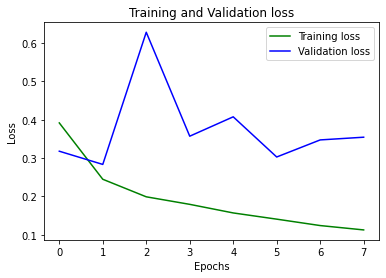

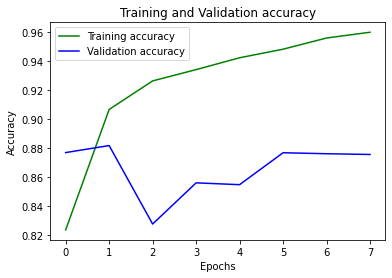

In [7]:
def plot_model(tf_history):
    loss_train = tf_history.history["loss"]
    loss_val = tf_history.history["val_loss"]
    plt.plot(loss_train, "g", label="Training loss")
    plt.plot(loss_val, "b", label="Validation loss")
    plt.title("Training and Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    loss_train = tf_history.history["accuracy"]
    loss_val = tf_history.history["val_accuracy"]
    plt.plot(loss_train, "g", label="Training accuracy")
    plt.plot(loss_val, "b", label="Validation accuracy")
    plt.title("Training and Validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


plot_model(history)

## Exercise 2

#### Load data

In [8]:
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train / 255
input_size = 28 * 28

x_train = x_train.reshape((x_train.shape[0], input_size))

latent_size = 64

#### PCA

In [9]:
weights_encoder = tf.Variable(
    np.random.normal(
        size=(input_size, latent_size), scale=np.sqrt(6 / (latent_size + input_size))
    )
)
weights_decoder = tf.Variable(
    np.random.normal(
        size=(latent_size, input_size), scale=np.sqrt(6 / (latent_size + input_size))
    )
)

In [10]:
weights_encoder

<tf.Variable 'Variable:0' shape=(784, 64) dtype=float64, numpy=
array([[ 0.0438776 ,  0.04234501, -0.01357064, ...,  0.17380414,
        -0.08697724,  0.03312812],
       [ 0.13030174,  0.10190569,  0.01288597, ..., -0.05891545,
        -0.14600905, -0.14947471],
       [-0.03779398,  0.16145425, -0.03213812, ...,  0.10777565,
        -0.02682676,  0.05812801],
       ...,
       [ 0.03083117, -0.08112208, -0.01137346, ..., -0.14569393,
        -0.06394161, -0.07060609],
       [ 0.04389079, -0.06498639,  0.02678528, ...,  0.11843029,
         0.08234794,  0.05625745],
       [-0.07174825, -0.01750163, -0.08829561, ..., -0.04803614,
         0.04516167, -0.07229356]])>

In [11]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)

In [12]:
batch_size = 32
bs = tf.cast(batch_size, tf.float64)
num_batches = int(np.floor(x_train.shape[0] / batch_size))

for i in range(num_batches):
    batch = x_train[i * batch_size : (i + 1) * batch_size + 1, :]
    with tf.GradientTape() as tape:
        latent = tf.matmul(batch, weights_encoder)
        reconstruction = tf.matmul(latent, weights_decoder)
        loss = tf.reduce_sum(tf.square(reconstruction - batch)) / bs

    variables = [weights_encoder, weights_decoder]
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    if i % 250 == 0:
        print(f"Batch {i} - Loss: {loss.numpy()}")

Batch 0 - Loss: 308.4347704526046
Batch 250 - Loss: 33.933228482040036
Batch 500 - Loss: 17.408171381214558
Batch 750 - Loss: 14.071504554381447
Batch 1000 - Loss: 11.748118675873163
Batch 1250 - Loss: 9.99884107201855
Batch 1500 - Loss: 10.407682881419491
Batch 1750 - Loss: 8.955791026062494


#### More advanced autoencoder

In [13]:
batch_size = 32
num_epochs = 15
(x_train, _), (_, _) = mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.map(lambda x: tf.cast(flatten(x), tf.float32) / 255)
dataset = dataset.shuffle(x_train.shape[0])
dataset = dataset.repeat(num_epochs)
dataset = dataset.batch(batch_size)

In [14]:
def make_weights(input_size, output_size):
    b = np.sqrt(6 / (output_size + input_size))
    weights = np.random.uniform(-b, b, (input_size, output_size))
    return tf.Variable(weights, dtype=tf.float32)


def make_bias(size):
    return tf.Variable(tf.zeros((1, size)), dtype=tf.float32)


ew1 = make_weights(784, 256)
eb1 = make_bias(256)
ew2 = make_weights(256, 64)
eb2 = make_bias(64)
dw1 = make_weights(64, 256)
db1 = make_bias(256)
dw2 = make_weights(256, 784)
db2 = make_bias(784)

In [15]:
def encoder(inputs):
    x = tf.matmul(inputs, ew1) + eb1
    x = tf.nn.tanh(x)
    return tf.matmul(x, ew2) + eb2


def decoder(latent):
    x = tf.matmul(latent, dw1) + db1
    x = tf.nn.tanh(x)
    return tf.matmul(x, dw2) + db2

In [16]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)

@tf.function
def training_step(batch):
    with tf.GradientTape() as tape:
        reconstruction = decoder(encoder(batch))
        loss = tf.reduce_sum(tf.square(reconstruction - batch))/batch.shape[0]

    variables = [ew1, eb1, ew2, eb2, dw1, db1, dw2, db2]
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return loss

def train(num_batches):
    for i, batch in enumerate(dataset):
        loss = training_step(batch)
        if i % 250 == 0:
            print(f"Batch {i} - Loss: {loss}")
        if i > num_batches:
            break


train(1500)

Batch 0 - Loss: 128.8943634033203
Batch 250 - Loss: 11.971966743469238
Batch 500 - Loss: 9.834606170654297
Batch 750 - Loss: 7.357369899749756
Batch 1000 - Loss: 8.448759078979492
Batch 1250 - Loss: 7.908270835876465
Batch 1500 - Loss: 6.881094455718994


In [17]:
img = tf.cast(
    x_train[5, :].reshape(1, -1),
    tf.float32,
)
dec = decoder(encoder(img)).numpy()
rec = dec.reshape((28, -1))
rec[rec < 0] = 0
rec[rec > 1] = 1

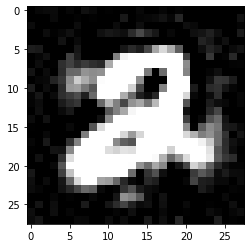

In [18]:
plt.imshow(rec, cmap="gray")

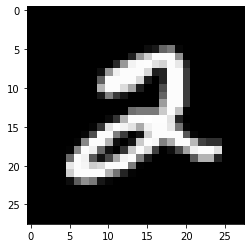

In [19]:
plt.imshow(
    x_train[5, :],
    cmap="gray",
)